In [1]:
# loading traditional packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import os
from sklearn.utils import resample

from tqdm import tqdm # progress bar

In [2]:
# OLS regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

# prediction metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# packages for statistical analysis
import statsmodels.formula.api as smFrmApi
import statsmodels.stats as statsmodels
import statsmodels.tsa.api as smt

from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import reset_ramsey

In [3]:
os.getcwd()

'/home/jovyan/New Folder'

In [84]:
import bootstrap as bs
import compare_functions as bs_compare
import stats_functions as bs_stats

In [3]:
data = pd.read_csv('data_standardized_final.csv')

In [4]:
data

,rental_area,annual_rental_cost_of_sq_m,shopping center,floor,target_audience,relative_interest_target audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,annual_sales_per_sq_m
0,-0.614169,-0.186480,-0.845154,-0.534522,1.226556,-0.299657,-0.724201,-0.527174,-0.556738,-0.969600,1.692456,387147
1,-0.849975,-1.218631,-0.845154,-0.534522,0.084888,-0.369821,-0.486352,-0.527174,-0.809641,0.384700,0.130189,199322
2,-0.567008,0.352245,-0.845154,-0.534522,2.340682,-0.422443,0.463163,-0.803120,0.286272,-0.204126,0.130189,257479
3,0.461966,0.591934,1.183216,-0.534522,-0.578136,-0.334739,-0.476951,-0.803120,1.129282,0.090287,0.130189,209175
4,0.341919,-1.270812,-0.845154,-0.534522,-0.578136,-0.334739,-0.476951,-0.803120,-0.957168,0.090287,0.130189,99026
5,-0.519846,1.354865,1.183216,1.069045,-0.266889,-0.399056,-0.335934,-0.320213,0.370573,-1.116806,0.130189,194142
6,-1.051483,0.747330,-0.845154,-0.534522,-1.957985,3.302075,2.493808,2.646216,-0.978243,1.562351,1.692456,99026
7,0.020365,-0.878594,1.183216,2.672612,-0.319691,-0.211953,-0.796590,0.335160,-0.472437,-0.498539,-1.432078,78220
8,2.258384,1.194882,1.183216,1.069045,0.443229,-0.130095,-0.317132,-0.734134,1.171433,-1.375890,0.130189,179249
9,-1.042908,1.285195,1.183216,-0.534522,-0.172273,-0.334739,-0.805051,1.107812,-0.451362,2.151177,-1.432078,417117


In [4]:
data0 = pd.read_csv('data_original.csv')
data0 = data0.drop('Unnamed: 0', axis = 1)

In [5]:
data0_quant=data0.drop(['store','latitude','longitude','relative_interest_target audience','parking_500_m',
                       'geometry','hex_id','json_encoded'], axis = 1)

In [9]:
data0_quant

,rental_area,annual_rental_cost_of_sq_m,shopping center,floor,target_audience,nearest_metro,nearest_hypermarket,presence_on_market,annual_sales_per_sq_m,nearest_sportmaster,competition_rate
0,172,13200,0,1,22369,177,400,28,387147,700,2
1,117,9600,0,1,14369,430,400,16,199322,3000,1
2,183,15079,0,1,30176,1440,0,68,257479,2000,1
3,423,15915,1,1,9723,440,0,108,209175,2500,1
4,395,9418,0,1,9723,440,0,9,99026,2500,1
5,194,18576,1,2,11904,590,700,72,194142,450,1
6,70,16457,0,1,54,3600,5000,8,99026,5000,2
7,320,10786,1,3,11534,100,1650,32,78220,1500,0
8,842,18018,1,2,16880,610,100,110,179249,10,1
9,72,18333,1,1,12567,91,2770,33,417117,6000,0


In [9]:
df0_3f = data0_quant[['annual_rental_cost_of_sq_m','floor','nearest_metro',
                     'presence_on_market','annual_sales_per_sq_m']]

In [77]:
df_4f = pd.read_csv('nl_stand_4_fact.csv')
df_4f

,annual_rental_cost_of_sq_m,floor,target_audience,nearest_metro
0,2.909685,-0.534522,2.350671,-0.805991
1,1.877821,-0.534522,-1.024814,-0.279527
2,3.932661,-0.534522,-1.024814,-0.726081
3,0.074998,1.069045,2.350671,-0.805991
4,4.630223,-0.534522,1.555927,-0.232521
5,6.350474,-0.534522,2.168861,-0.655573
6,6.350474,-0.534522,4.734618,0.002507
7,2.909972,1.069045,0.381151,0.049513
8,-0.530530,-0.534522,0.381151,0.519569
9,2.221872,-0.534522,-0.880250,-0.724201


In [10]:
df0_3f.corr(method = 'pearson').round(2)

,annual_rental_cost_of_sq_m,floor,nearest_metro,presence_on_market,annual_sales_per_sq_m
annual_rental_cost_of_sq_m,1.00,0.11,0.09,0.15,0.42
floor,0.11,1.00,-0.30,0.08,-0.32
nearest_metro,0.09,-0.30,1.00,-0.29,-0.45
presence_on_market,0.15,0.08,-0.29,1.00,0.06
annual_sales_per_sq_m,0.42,-0.32,-0.45,0.06,1.00


In [5]:
data2 = data.copy()

In [6]:
data2['annual_sales_per_sq_m'] = data2['annual_sales_per_sq_m'].apply(lambda x: math.log(x) )

In [7]:
data2

,rental_area,annual_rental_cost_of_sq_m,shopping center,floor,target_audience,relative_interest_target audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,annual_sales_per_sq_m
0,-0.614169,-0.186480,-0.845154,-0.534522,1.226556,-0.299657,-0.724201,-0.527174,-0.556738,-0.969600,1.692456,12.866560
1,-0.849975,-1.218631,-0.845154,-0.534522,0.084888,-0.369821,-0.486352,-0.527174,-0.809641,0.384700,0.130189,12.202677
2,-0.567008,0.352245,-0.845154,-0.534522,2.340682,-0.422443,0.463163,-0.803120,0.286272,-0.204126,0.130189,12.458693
3,0.461966,0.591934,1.183216,-0.534522,-0.578136,-0.334739,-0.476951,-0.803120,1.129282,0.090287,0.130189,12.250927
4,0.341919,-1.270812,-0.845154,-0.534522,-0.578136,-0.334739,-0.476951,-0.803120,-0.957168,0.090287,0.130189,11.503138
5,-0.519846,1.354865,1.183216,1.069045,-0.266889,-0.399056,-0.335934,-0.320213,0.370573,-1.116806,0.130189,12.176345
6,-1.051483,0.747330,-0.845154,-0.534522,-1.957985,3.302075,2.493808,2.646216,-0.978243,1.562351,1.692456,11.503138
7,0.020365,-0.878594,1.183216,2.672612,-0.319691,-0.211953,-0.796590,0.335160,-0.472437,-0.498539,-1.432078,11.267281
8,2.258384,1.194882,1.183216,1.069045,0.443229,-0.130095,-0.317132,-0.734134,1.171433,-1.375890,0.130189,12.096531
9,-1.042908,1.285195,1.183216,-0.534522,-0.172273,-0.334739,-0.805051,1.107812,-0.451362,2.151177,-1.432078,12.941122


In [10]:
df_model_check = data2.copy()

In [11]:
df_model_check['annual_sales_model'] = median_intercept + median_slope_rental_cost*df_model_check['annual_rental_cost_of_sq_m']+median_slope_metro*df_model_check['nearest_metro'] +median_slope_floor*df_model_check['floor']

In [12]:
df_model_check

,rental_area,annual_rental_cost_of_sq_m,shopping center,floor,target_audience,relative_interest_target audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,annual_sales_per_sq_m,annual_sales_model
0,-0.614169,-0.186480,-0.845154,-0.534522,1.226556,-0.299657,-0.724201,-0.527174,-0.556738,-0.969600,1.692456,12.866560,12.452482
1,-0.849975,-1.218631,-0.845154,-0.534522,0.084888,-0.369821,-0.486352,-0.527174,-0.809641,0.384700,0.130189,12.202677,12.036579
2,-0.567008,0.352245,-0.845154,-0.534522,2.340682,-0.422443,0.463163,-0.803120,0.286272,-0.204126,0.130189,12.458693,12.156330
3,0.461966,0.591934,1.183216,-0.534522,-0.578136,-0.334739,-0.476951,-0.803120,1.129282,0.090287,0.130189,12.250927,12.599191
4,0.341919,-1.270812,-0.845154,-0.534522,-0.578136,-0.334739,-0.476951,-0.803120,-0.957168,0.090287,0.130189,11.503138,12.016579
5,-0.519846,1.354865,1.183216,1.069045,-0.266889,-0.399056,-0.335934,-0.320213,0.370573,-1.116806,0.130189,12.176345,12.224283
6,-1.051483,0.747330,-0.845154,-0.534522,-1.957985,3.302075,2.493808,2.646216,-0.978243,1.562351,1.692456,11.503138,11.485251
7,0.020365,-0.878594,1.183216,2.672612,-0.319691,-0.211953,-0.796590,0.335160,-0.472437,-0.498539,-1.432078,11.267281,11.147645
8,2.258384,1.194882,1.183216,1.069045,0.443229,-0.130095,-0.317132,-0.734134,1.171433,-1.375890,0.130189,12.096531,12.166888
9,-1.042908,1.285195,1.183216,-0.534522,-0.172273,-0.334739,-0.805051,1.107812,-0.451362,2.151177,-1.432078,12.941122,12.944418


In [14]:
df_model_check['exp_annual_sales'] = np.exp(df_model_check['annual_sales_per_sq_m'])
df_model_check['exp_annual_sales_model'] = np.exp(df_model_check['annual_sales_model'])
df_model_check['error'] = df_model_check['exp_annual_sales_model'] - df_model_check['exp_annual_sales']

In [15]:
df_model_check

,rental_area,annual_rental_cost_of_sq_m,shopping center,floor,target_audience,relative_interest_target audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,annual_sales_per_sq_m,annual_sales_model,exp_annual_sales,exp_annual_sales_model,error
0,-0.614169,-0.186480,-0.845154,-0.534522,1.226556,-0.299657,-0.724201,-0.527174,-0.556738,-0.969600,1.692456,12.866560,12.452482,387147.0,255884.719934,-131262.280066
1,-0.849975,-1.218631,-0.845154,-0.534522,0.084888,-0.369821,-0.486352,-0.527174,-0.809641,0.384700,0.130189,12.202677,12.036579,199322.0,168818.397043,-30503.602957
2,-0.567008,0.352245,-0.845154,-0.534522,2.340682,-0.422443,0.463163,-0.803120,0.286272,-0.204126,0.130189,12.458693,12.156330,257479.0,190294.901769,-67184.098231
3,0.461966,0.591934,1.183216,-0.534522,-0.578136,-0.334739,-0.476951,-0.803120,1.129282,0.090287,0.130189,12.250927,12.599191,209175.0,296318.815972,87143.815972
4,0.341919,-1.270812,-0.845154,-0.534522,-0.578136,-0.334739,-0.476951,-0.803120,-0.957168,0.090287,0.130189,11.503138,12.016579,99026.0,165475.634412,66449.634412
5,-0.519846,1.354865,1.183216,1.069045,-0.266889,-0.399056,-0.335934,-0.320213,0.370573,-1.116806,0.130189,12.176345,12.224283,194142.0,203675.530425,9533.530425
6,-1.051483,0.747330,-0.845154,-0.534522,-1.957985,3.302075,2.493808,2.646216,-0.978243,1.562351,1.692456,11.503138,11.485251,99026.0,97270.502841,-1755.497159
7,0.020365,-0.878594,1.183216,2.672612,-0.319691,-0.211953,-0.796590,0.335160,-0.472437,-0.498539,-1.432078,11.267281,11.147645,78220.0,69400.166485,-8819.833515
8,2.258384,1.194882,1.183216,1.069045,0.443229,-0.130095,-0.317132,-0.734134,1.171433,-1.375890,0.130189,12.096531,12.166888,179249.0,192314.533472,13065.533472
9,-1.042908,1.285195,1.183216,-0.534522,-0.172273,-0.334739,-0.805051,1.107812,-0.451362,2.151177,-1.432078,12.941122,12.944418,417117.0,418493.989520,1376.989520


In [17]:
sum(np.abs(df_model_check['error']))

434580.5366881493

In [18]:
df_model_check.to_excel("model_error.xlsx")

<AxesSubplot:ylabel='Frequency'>

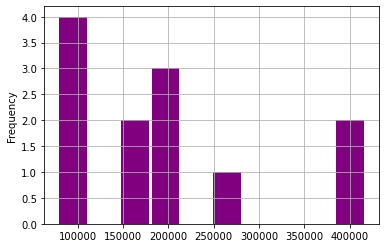

In [13]:
data['annual_sales_per_sq_m'].plot.hist(grid=True, rwidth=0.9, color='purple')

In [145]:
data.corr(method = 'spearman').round(2)

,rental_area,annual_rental_cost_of_sq_m,shopping center,floor,target_audience,relative_interest_target audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,annual_sales_per_sq_m
rental_area,1.00,-0.28,0.27,0.35,0.04,0.21,0.11,-0.47,0.60,-0.44,-0.19,-0.34
annual_rental_cost_of_sq_m,-0.28,1.00,0.61,0.29,0.00,-0.13,0.02,0.17,0.20,-0.20,0.05,0.41
shopping center,0.27,0.61,1.00,0.68,-0.15,0.02,-0.44,0.02,0.52,-0.27,-0.41,0.15
floor,0.35,0.29,0.68,1.00,-0.01,0.11,-0.19,0.06,0.32,-0.64,-0.27,-0.32
target_audience,0.04,0.00,-0.15,-0.01,1.00,-0.23,-0.07,-0.28,0.46,-0.32,0.10,0.54
relative_interest_target audience,0.21,-0.13,0.02,0.11,-0.23,1.00,0.07,0.37,0.04,0.16,0.27,-0.34
nearest_metro,0.11,0.02,-0.44,-0.19,-0.07,0.07,1.00,0.07,-0.07,-0.05,0.29,-0.41
nearest_hypermarket,-0.47,0.17,0.02,0.06,-0.28,0.37,0.07,1.00,-0.32,0.34,-0.26,-0.30
presence_on_market,0.60,0.20,0.52,0.32,0.46,0.04,-0.07,-0.32,1.00,-0.25,-0.09,0.34
nearest_sportmaster,-0.44,-0.20,-0.27,-0.64,-0.32,0.16,-0.05,0.34,-0.25,1.00,-0.02,0.14


### Model with 4 factors and logged target variable. 

In [78]:
model1 = smFrmApi.ols('annual_sales_per_sq_m ~ target_audience + annual_rental_cost_of_sq_m + nearest_metro + floor', data2).fit()
model1.summary()

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     annual_sales_per_sq_m   R-squared:                       0.882
Model:                               OLS   Adj. R-squared:                  0.815
Method:                    Least Squares   F-statistic:                     13.12
Date:                   Thu, 18 May 2023   Prob (F-statistic):            0.00229
Time:                           15:14:21   Log-Likelihood:                 3.1369
No. Observations:                     12   AIC:                             3.726
Df Residuals:                          7   BIC:                             6.151
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     12.0417      0.070    171.002      0.000      11.875      12.208
target_audience                0.1705      0.077      2.210      0.063      -0.012       0.353
annual_rental_cost_of_sq_m     0.3050      0.071      4.269      0.004       0.136       0.474
nearest_metro                 -0.3143      0.081     -3.862      0.006      -0.507      -0.122
floor                         -0.2978      0.076     -3.916      0.006      -0.478      -0.118
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.575
Skew:                          -0.255   Prob(JB):                        0.750
Kurtosis:                       2.056   Cond. No.                         1.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
model1.predict(df_4f)

0     13.742503
1     12.686827
2     13.453975
3     12.400332
4     13.951635
5     14.713829
6     14.944446
7     12.660503
8     11.940749
9     12.956164
10    11.894105
11    12.761056
dtype: float64

In [16]:
 model1.params[0]

12.041725079408744

In [8]:
#Model with 3 factors and logged target variable.
model3 = smFrmApi.ols('annual_sales_per_sq_m ~ annual_rental_cost_of_sq_m + nearest_metro + floor', data2).fit()
model3.summary()

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     annual_sales_per_sq_m   R-squared:                       0.800
Model:                               OLS   Adj. R-squared:                  0.725
Method:                    Least Squares   F-statistic:                     10.68
Date:                   Thu, 18 May 2023   Prob (F-statistic):            0.00359
Time:                           09:35:38   Log-Likelihood:              -0.038123
No. Observations:                     12   AIC:                             8.076
Df Residuals:                          8   BIC:                             10.02
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     12.0417      0.086    140.311      0.000      11.844      12.240
annual_rental_cost_of_sq_m     0.3113      0.087      3.578      0.007       0.111       0.512
nearest_metro                 -0.3870      0.091     -4.266      0.003      -0.596      -0.178
floor                         -0.3308      0.091     -3.641      0.007      -0.540      -0.121
==============================================================================
Omnibus:                        0.807   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.211
Skew:                          -0.321   Prob(JB):                        0.900
Kurtosis:                       2.899   Cond. No.                         1.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Model with 4 factors and original target variable.
model2 = smFrmApi.ols('annual_sales_per_sq_m ~ target_audience + annual_rental_cost_of_sq_m + nearest_metro + floor', data).fit()
model2.summary()

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     annual_sales_per_sq_m   R-squared:                       0.775
Model:                               OLS   Adj. R-squared:                  0.646
Method:                    Least Squares   F-statistic:                     6.028
Date:                   Mon, 15 May 2023   Prob (F-statistic):             0.0201
Time:                           19:02:03   Log-Likelihood:                -147.06
No. Observations:                     12   AIC:                             304.1
Df Residuals:                          7   BIC:                             306.5
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.963e+05   1.92e+04     10.221      0.000    1.51e+05    2.42e+05
target_audience             2.964e+04    2.1e+04      1.409      0.202   -2.01e+04    7.94e+04
annual_rental_cost_of_sq_m  5.642e+04   1.95e+04      2.895      0.023    1.03e+04    1.03e+05
nearest_metro              -5.944e+04   2.22e+04     -2.678      0.032   -1.12e+05   -6952.828
floor                      -5.611e+04   2.07e+04     -2.706      0.030   -1.05e+05   -7070.481
==============================================================================
Omnibus:                        1.069   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.815
Skew:                           0.363   Prob(JB):                        0.665
Kurtosis:                       1.950   Cond. No.                         1.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#Model with 3 factors and original target variable. 
model4 = smFrmApi.ols('annual_sales_per_sq_m ~ annual_rental_cost_of_sq_m + nearest_metro + floor', data).fit()
model4.summary()

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     annual_sales_per_sq_m   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.603
Method:                    Least Squares   F-statistic:                     6.568
Date:                   Mon, 15 May 2023   Prob (F-statistic):             0.0150
Time:                           19:02:03   Log-Likelihood:                -148.56
No. Observations:                     12   AIC:                             305.1
Df Residuals:                          8   BIC:                             307.1
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.963e+05   2.04e+04      9.645      0.000    1.49e+05    2.43e+05
annual_rental_cost_of_sq_m  5.751e+04   2.06e+04      2.787      0.024    9926.285    1.05e+05
nearest_metro              -7.208e+04   2.15e+04     -3.351      0.010   -1.22e+05   -2.25e+04
floor                      -6.185e+04   2.15e+04     -2.870      0.021   -1.12e+05   -1.22e+04
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   1.463
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.133
Skew:                           0.124   Prob(JB):                        0.936
Kurtosis:                       2.548   Cond. No.                         1.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

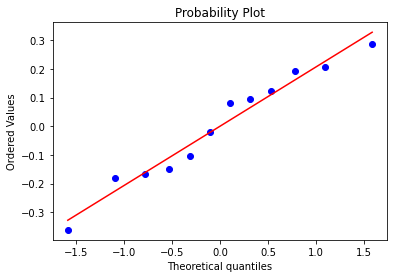

In [20]:
stats.probplot(model1.resid, dist="norm", plot=plt)
plt.show()

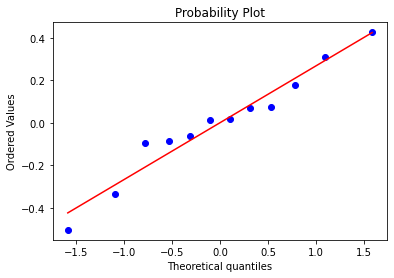

In [9]:
stats.probplot(model3.resid, dist="norm", plot=plt)
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


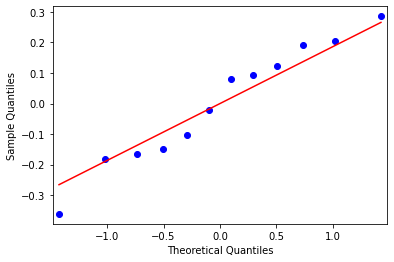

In [21]:
qqplot(model1.resid, line='s');

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


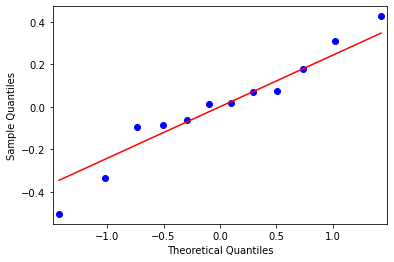

In [10]:
qqplot(model3.resid, line='s');

In [22]:
#Here we test if our model's residuals are normally distributed (with the expected mean of 0)
stats.jarque_bera(model1.resid)

Jarque_beraResult(statistic=0.5754568155761922, pvalue=0.7499652493028625)

In [11]:
stats.jarque_bera(model3.resid)

Jarque_beraResult(statistic=0.2108362555959462, pvalue=0.8999481505674606)

In [23]:
#Here we test if our model requires any nonlinear transformations. The null hypothesis is that the current model is
#adequately specified. The test p-value confirms it. 
reset_ramsey(model1, degree=3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.51537966]]), p=0.6258856852052178, df_denom=5, df_num=2>

In [12]:
#Here we test if our model requires any nonlinear transformations. The null hypothesis is that the current model is
#adequately specified. The test p-value confirms it. 
reset_ramsey(model3, degree=3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.07729072]]), p=0.9265272190147225, df_denom=6, df_num=2>

In [24]:
# Multicollinearity Test
dfXX = data0_quant.drop(['annual_sales_per_sq_m'], axis=1)

dfVIFs = pd.DataFrame()
dfVIFs['regressor'] = dfXX.columns
dfVIFs['VIF'] = np.linalg.inv(dfXX.corr().to_numpy()).diagonal().round(2)
dfVIFs

,regressor,VIF
0,rental_area,3.65
1,annual_rental_cost_of_sq_m,15.23
2,shopping center,35.14
3,floor,7.42
4,target_audience,6.86
5,nearest_metro,8.74
6,nearest_hypermarket,9.92
7,presence_on_market,4.01
8,nearest_sportmaster,6.11
9,competition_rate,4.59


In [7]:
# resample with replacement each row
boot_slope_rental_cost = []
boot_slope_metro = []
boot_slope_floor = []
boot_interc = []
n_boots = 1000
n_points = 12
for _ in range(n_boots):
 # sample the rows, same size, with replacement
 sample_df = data2.sample(n=n_points, replace=True)
 # fit a linear regression
 ols_model_temp = smFrmApi.ols(formula = 'annual_sales_per_sq_m ~ annual_rental_cost_of_sq_m + nearest_metro + floor', data=sample_df)
 results_temp = ols_model_temp.fit()
 
 # append coefficients
 boot_interc.append(results_temp.params[0]) 
 boot_slope_rental_cost.append(results_temp.params[1])
 boot_slope_metro.append(results_temp.params[2])
 boot_slope_floor.append(results_temp.params[3])
 


In [124]:
boot_slope_floor

[-0.3230769729528207,
 -0.2668249108908487,
 -0.30232557481685074,
 -0.49499874975969993,
 -0.32219715310420016,
 -0.3153180723611142,
 -0.28872150340856073,
 -0.3276126676750648,
 -0.3001925782186017,
 -0.3157296833795239,
 -0.36697637669901373,
 -0.4919639506716056,
 -0.35421896890626847,
 -0.26274627963837105,
 -0.22951798426779124,
 -0.31423376070404085,
 -0.23917497361217088,
 -0.3289491615401181,
 -0.3118909430300578,
 -0.16633638415691765,
 -0.35115927969665917,
 -5.137316927189762,
 -0.3940938470929707,
 -0.426173909329286,
 -0.22087143701693224,
 -0.2893396950286159,
 -0.22200190558086108,
 -0.3103655381974335,
 -0.39873855041490636,
 -5.077481223196908,
 -0.3396028415705916,
 -0.29385543620189214,
 -0.28022780129851155,
 -0.4366045737659533,
 -0.11232008980339803,
 -0.25845513787813035,
 -0.49568587082765436,
 -0.40596920642308654,
 -0.4011721499897214,
 -0.3033763205437694,
 -0.21956011989107688,
 -0.856349016710813,
 -0.4515139055104933,
 -0.44402655962795645,
 -0.238137614

In [141]:
# resample with replacement each row
boot_slope_ta = []
boot_slope_rental_cost2 = []
boot_slope_metro2 = []
boot_slope_floor2 = []
boot_interc2 = []
n_boots = 1000
n_points = 12
for _ in range(n_boots):
 # sample the rows, same size, with replacement
 sample_df = data2.sample(n=n_points, replace=True)
 # fit a linear regression
 ols_model_temp2 = smFrmApi.ols(formula = 'annual_sales_per_sq_m ~ annual_rental_cost_of_sq_m + nearest_metro + floor + target_audience', data=sample_df)
 results_temp2 = ols_model_temp2.fit()
 
 # append coefficients
 boot_interc2.append(results_temp2.params[0]) 
 boot_slope_rental_cost2.append(results_temp2.params[1])
 boot_slope_metro2.append(results_temp2.params[2])
 boot_slope_floor2.append(results_temp2.params[3])
 boot_slope_ta.append(results_temp2.params[4])

In [142]:
results_temp2.params

Intercept                     12.026946
annual_rental_cost_of_sq_m     0.245137
nearest_metro                 -0.426353
floor                         -0.329812
target_audience               -0.034028
dtype: float64

In [113]:
boot_slope_ta = (boot_slope_ta,)

In [119]:
boot_slope_floor2

[-0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.24585932612719663,
 -0.2458593

In [114]:
bootstrap(boot_slope_ta, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.1594423069137294, high=0.1594423069137294), standard_error=0.0)

In [140]:
results_temp2.params

Intercept                     12.058381
annual_rental_cost_of_sq_m     0.319609
nearest_metro                 -0.248264
floor                         -0.245859
target_audience                0.159442
dtype: float64

In [15]:
model3.params.keys()

Index(['Intercept', 'annual_rental_cost_of_sq_m', 'nearest_metro', 'floor'], dtype='object')

In [16]:
model3.params

Intercept                     12.041725
annual_rental_cost_of_sq_m     0.311300
nearest_metro                 -0.386986
floor                         -0.330796
dtype: float64

In [17]:
len(boot_interc)

1000

In [139]:
 boot_slope_metro

[-0.4104263061913335,
 -0.3012286286906971,
 -0.0933132390620095,
 -0.415279603866892,
 -0.40827289709937586,
 -0.3925409480406752,
 -0.6005359685474989,
 -0.38902629040252046,
 -0.06573317760438402,
 -0.3293476613881312,
 -0.460555063648035,
 -0.36417426804908337,
 -0.4540224540751894,
 -0.31716158031932684,
 -0.24077617666572015,
 -0.37850840644766404,
 -0.3314511556423665,
 -0.4089185239886428,
 -0.46228628189170085,
 0.31003797020047985,
 -0.44688516354918306,
 -0.45621757454585365,
 -0.4845912353859856,
 -0.4083422902713414,
 -0.2837745621756693,
 -0.3500927428149674,
 -0.05222722983059036,
 -0.36807611944746665,
 -0.2670509310985072,
 -0.40413571737860954,
 -0.43741589805361913,
 -0.28998771985404503,
 -0.34849807112695186,
 -0.578612340277727,
 -1.4439834757894534,
 -0.3729653732879059,
 -0.39564509829637795,
 -0.5384598784837926,
 -1.7514031326083312,
 -0.3099022246734857,
 -0.277876227493032,
 -0.5549304473039602,
 -0.35439582575673856,
 -0.47466578846947094,
 -0.3854180176012

In [133]:
mean_intercept = np.mean ( boot_interc)
mean_slope_rental_cost = np.mean(boot_slope_rental_cost)
mean_slope_metro = np.mean(boot_slope_metro)
mean_slope_floor = np.mean(boot_slope_floor)

In [8]:
median_intercept = np.median ( boot_interc)
median_slope_rental_cost = np.median(boot_slope_rental_cost)
median_slope_metro = np.median(boot_slope_metro)
median_slope_floor = np.median(boot_slope_floor)

In [9]:
print(" Median for bootrstrapped intercept: ",median_intercept, "\n Median for bootstrapped rental_cost: ", median_slope_rental_cost, "\n Median for bootstrapped metro: ", 
                                                     median_slope_metro, "\n Median for bootstrapped floor: ",
    median_slope_floor )

 Median for bootrstrapped intercept:  12.041291724290648 
 Median for bootstrapped rental_cost:  0.3127706225383211 
 Median for bootstrapped metro:  -0.39132878898362433 
 Median for bootstrapped floor:  -0.3481900683964305


In [136]:
print(" Mean for bootrstrapped intercept: ",mean_intercept, "\n Mean for bootstrapped rental_cost: ", mean_slope_rental_cost, "\n Mean for bootstrapped metro: ", 
                                                     mean_slope_metro, "\n Mean for bootstrapped floor: ",
    mean_slope_floor )

 Mean for bootrstrapped intercept:  11.939502042206158 
 Mean for bootstrapped rental_cost:  0.32925555867944456 
 Mean for bootstrapped metro:  -0.39133673144332987 
 Mean for bootstrapped floor:  -0.5430648573519413


In [39]:
test_df = pd.read_csv("new_locations_stand.csv")
test_df

,annual_rental_cost_of_sq_m,floor,nearest_metro
0,2.909685,-0.534522,-0.805991
1,1.877821,-0.534522,-0.279527
2,3.932661,-0.534522,-0.726081
3,0.074998,1.069045,-0.805991
4,4.630223,-0.534522,-0.232521
5,6.350474,-0.534522,-0.655573
6,6.350474,-0.534522,0.002507
7,2.909972,1.069045,0.049513
8,-0.530530,-0.534522,0.519569
9,2.221872,-0.534522,-0.724201


In [137]:
test_df['median_annual_sales_per_sq_m'] = median_intercept + median_slope_rental_cost*test_df['annual_rental_cost_of_sq_m']+median_slope_metro*test_df['nearest_metro'] +median_slope_floor*test_df['floor']
test_df['mean_annual_sales_per_sq_m'] = mean_intercept + mean_slope_rental_cost*test_df['annual_rental_cost_of_sq_m']+mean_slope_metro*test_df['nearest_metro'] +mean_slope_floor*test_df['floor']
                               

In [138]:
test_df

,annual_rental_cost_of_sq_m,floor,nearest_metro,annual_sales_per_sq_m,median_annual_sales_per_sq_m,mean_annual_sales_per_sq_m
0,2.909685,-0.534522,-0.805991,13.503226,13.473183,13.503226
1,1.877821,-0.534522,-0.279527,12.957455,12.937230,12.957455
2,3.932661,-0.534522,-0.726081,13.808775,13.770666,13.808775
3,0.074998,1.069045,-0.805991,11.699049,12.006342,11.699049
4,4.630223,-0.534522,-0.232521,13.845303,13.802912,13.845303
5,6.350474,-0.534522,-0.655573,14.577261,14.519761,14.577261
6,6.350474,-0.534522,0.002507,14.319730,14.264055,14.319730
7,2.909972,1.069045,0.049513,12.297690,12.584389,12.297690
8,-0.530530,-0.534522,0.519569,11.851776,11.853276,11.851776
9,2.221872,-0.534522,-0.724201,13.244752,13.220507,13.244752


In [144]:
model3.predict(test_df)

0     13.436235
1     12.911282
2     13.723763
3     12.023343
4     13.749914
5     14.449142
6     14.194475
7     12.574803
8     11.852323
9     13.190467
10    12.121543
11    12.835324
dtype: float64

In [75]:
test_original = pd.read_csv('new_locations.csv')
test_original

,link,address,annual_rental_cost_of_sq_m,floor,nearest_metro,rental_area,latitude,longitude
0,https://spb.cian.ru/rent/commercial/280900177/,"г. Санкт-Петербург, Лиговский просп., 153",23999,1,90,"191,0",59.914694,30.349404
1,https://spb.cian.ru/rent/commercial/269688270/,"г. Санкт-Петербург, ул. Эсперова, 10",20400,1,650,"103,4",59.973691,30.270679
2,https://spb.cian.ru/rent/commercial/286072567/,"г. Санкт-Петербург, Морской просп., 28",27567,1,175,"370,0",60.008726,29.996972
3,https://spb.cian.ru/rent/commercial/286877792/,"г. Санкт-Петербург, Лиговский просп., 153",14112,2,90,"170,0",59.914694,30.349404
4,https://spb.cian.ru/rent/commercial/286166797/,"г. Санкт-Петербург, ул. Профессора Попова, 23",30000,1,700,"339,4",59.971414,30.314095
5,https://spb.cian.ru/rent/commercial/280494110/,"г. Санкт-Петербург, Московский просп., 3аБ",36000,1,250,"150,0",59.716831,30.418267
6,https://spb.cian.ru/rent/commercial/283393506/,"г. Санкт-Петербург, пер. Басков, 2",36000,1,950,"234,0",59.940484,30.350646
7,https://spb.cian.ru/rent/commercial/272561084,"г. Санкт-Петербург, Заневский просп., 65К2",24000,2,1000,"327,8",59.931770,30.429598
8,https://spb.cian.ru/rent/commercial/281103385/,"г. Санкт-Петербург, просп. Шаумяна, 2",12000,1,1500,"100,0",59.941421,30.413713
9,https://spb.cian.ru/rent/commercial/271174694/,"г. Санкт-Петербург, ул. Салова, 61",21600,1,177,"112,0",59.885145,30.369008


In [33]:
np.mean(boot_slope_rental_cost)    

0.3217675445074042

In [35]:
np.median(boot_slope_rental_cost)    

0.3170014431058722

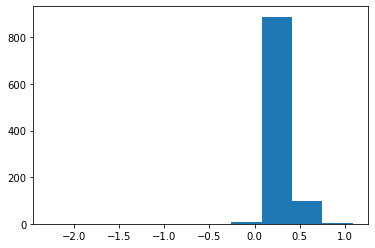

In [33]:
plt.hist(boot_slope_rental_cost);

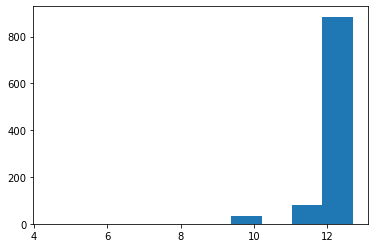

In [34]:
plt.hist(boot_interc);

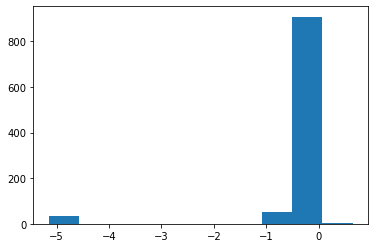

In [35]:
plt.hist(boot_slope_floor);

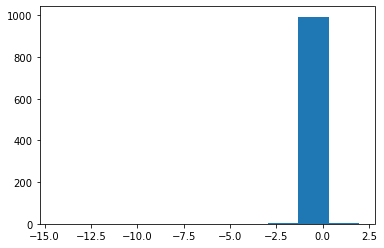

In [36]:
plt.hist(boot_slope_metro);

In [97]:
from scipy.stats import bootstrap

In [92]:
boot_slope_rental_cost = (boot_slope_rental_cost,)
boot_interc = ( boot_interc,)
boot_slope_floor = (boot_slope_floor,)
boot_slope_metro = (boot_slope_metro,)

In [95]:
boot_slope_metro

([-0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817484767,
  -0.34367389817

In [102]:
#calculate 95% bootstrapped confidence interval for median
metro_ci = bootstrap(boot_slope_metro, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(metro_ci.confidence_interval)

ConfidenceInterval(low=-0.34367389817484767, high=-0.34367389817484767)


In [104]:
rental_cost_ci = bootstrap(boot_slope_rental_cost, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(rental_cost_ci.confidence_interval)

ConfidenceInterval(low=0.31460091444922034, high=0.31460091444922034)


In [105]:
ta_ci = bootstrap(boot_slope_ta, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(ta_ci.confidence_interval)

ValueError: `data` must contain at least one sample.

In [106]:
floor_ci = bootstrap(boot_slope_floor, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(floor_ci.confidence_interval)

ConfidenceInterval(low=-0.28041902974425037, high=-0.28041902974425037)


In [108]:
interc_ci = bootstrap(boot_interc, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(interc_ci.confidence_interval)

ConfidenceInterval(low=12.019371580646663, high=12.019371580646663)
